## PART 1: Data Processing

#### Load data

In [5]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [7]:
mrkt_df = pd.read_csv('/Users/anish/OneDrive - Dickinson College/Documents/GitHub/DATA300-Group-Project/marketing_campaign.csv', sep=',')

In [9]:
mrkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Cleaning the dataset

In [11]:
print("Dimension of the data: ", mrkt_df.shape)
no_of_rows = mrkt_df.shape[0]
no_of_columns = mrkt_df.shape[1]
print(f'No. of Rows: {no_of_rows}')
print(f'No. of Columns: {no_of_columns}')

Dimension of the data:  (2240, 29)
No. of Rows: 2240
No. of Columns: 29


In [13]:
#check income column
mrkt_df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [15]:
# Write a function to count NA cells in income column
def NaCount(dataFrame, columnName):
   count = dataFrame[columnName].isna().sum()
   return count
count = NaCount(mrkt_df, 'Income')
print(f'Number of missing values in Income Column: {count}')

Number of missing values in Income Column: 24


In [17]:
#dropping the missing value rows
mrkt_df = mrkt_df.dropna(subset=['Income'])

#### Normalizing income variable

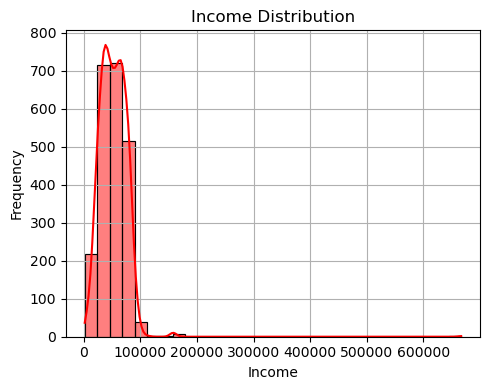

In [19]:
#check distribution of income variable
plt.figure(figsize=(5, 4))
sns.histplot(mrkt_df['Income'], kde=True, bins=30, color='red', edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

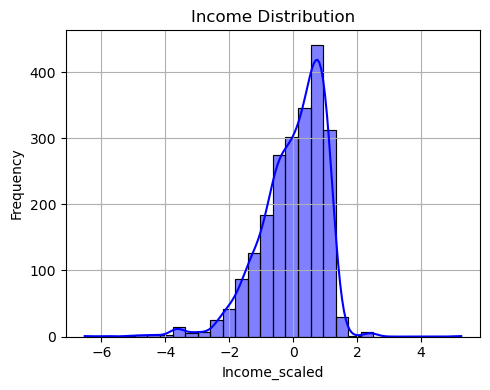

In [21]:
#since histogram appears right-skewed, we use log transformation to normalize the income
mrkt_df['Income_log'] = np.log1p(mrkt_df['Income'])
#standardize
scaler = StandardScaler()
mrkt_df['Income_scaled'] = scaler.fit_transform(mrkt_df[['Income_log']])

#check distribution of income variable
plt.figure(figsize=(5, 4))
sns.histplot(mrkt_df['Income_scaled'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income_scaled')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
#Convert Dt_Customer to date column
mrkt_df['Dt_Customer'] = pd.to_datetime(mrkt_df['Dt_Customer'], format="%d-%m-%Y")

#### Only Numerical Dataset

In [35]:
num_df = mrkt_df[['Year_Birth', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Income_scaled','Response']]
num_df

,Year_Birth,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income_scaled,Response
0,1957,58,635,88,546,172,88,88,3,8,10,4,7,0.428623,1
1,1954,38,11,1,6,2,1,6,2,1,1,2,5,-0.019686,0
2,1965,26,426,49,127,111,21,42,1,8,2,10,4,0.840808,0
3,1984,26,11,4,20,10,3,5,2,2,0,4,6,-1.114019,0
4,1981,94,173,43,118,46,27,15,5,5,3,6,5,0.433888,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,46,709,43,182,42,118,247,2,9,3,4,5,0.530857,0
2236,1946,56,406,0,30,0,0,8,7,8,2,5,7,0.619003,0
2237,1981,91,908,48,217,32,12,24,1,2,3,13,6,0.388876,0
2238,1956,8,428,30,214,80,30,61,2,6,5,10,3,0.774319,0


#### Encoding categorical variables

In [37]:
#list of categorical values
category_cols = mrkt_df.select_dtypes(include='object').columns
print("Categorical columns:\n", category_cols)

Categorical columns:
 Index(['Education', 'Marital_Status'], dtype='object')


In [39]:
#Label Encoding: Education (since its ordinal)
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
mrkt_df['Education_encoded'] = mrkt_df['Education'].astype(pd.CategoricalDtype(categories=education_order, ordered=True)).cat.codes

In [41]:
#Marital Status: Group some strange categories together
mrkt_df['Marital_Status_Clean'] = mrkt_df['Marital_Status'].replace({
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Other',
    'Widow': 'Other'
})

In [43]:
#One-Hot Encoding for marital status
marital_dummies = pd.get_dummies(mrkt_df['Marital_Status_Clean'], prefix='Marital', dtype=int)
mrkt_df = pd.concat([mrkt_df, marital_dummies], axis=1)


In [45]:
mrkt_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Income_log,Income_scaled,Education_encoded,Marital_Status_Clean,Marital_Divorced,Marital_Married,Marital_Other,Marital_Single,Marital_Together
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,10.970592,0.428623,2,Single,0,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,10.743869,-0.019686,2,Single,0,0,0,1,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,11.179046,0.840808,2,Together,0,0,0,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,10.190432,-1.114019,2,Together,0,0,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,10.973254,0.433888,4,Married,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,11.022295,0.530857,2,Married,0,1,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,11.066873,0.619003,4,Together,0,0,0,0,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,10.950491,0.388876,2,Divorced,1,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,11.145421,0.774319,3,Together,0,0,0,0,1


In [49]:
#Numerical columns only
category = mrkt_df.drop(['Education', 'Marital_Status', 'Income','Dt_Customer','Income_log','Marital_Status_Clean','Z_CostContact',
                         'Z_Revenue','Year_Birth', 'Recency', 'MntWines',
                         'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                         'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                         'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                         'Income_scaled', 'ID'], axis=1)
category

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_encoded,Marital_Divorced,Marital_Married,Marital_Other,Marital_Single,Marital_Together
0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,2,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0
2236,2,1,0,0,0,1,0,0,0,4,0,0,0,0,1
2237,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0
2238,0,1,0,0,0,0,0,0,0,3,0,0,0,0,1


## Part 2: Feature Selection

In this project, we want our features to be our customers' information (income, purchasing history, etc).

#### Check for correlation numerical

In [63]:
most_correlated = num_df.corr().abs()['Response'].sort_values(ascending=False)
print("Most Correlated Features:\n")
print(most_correlated)

Most Correlated Features:

Response               1.000000
MntWines               0.246299
MntMeatProducts        0.237746
NumCatalogPurchases    0.219914
Recency                0.199766
NumWebPurchases        0.151431
MntGoldProds           0.140332
Income_scaled          0.127392
MntFruits              0.122443
MntSweetProducts       0.116170
MntFishProducts        0.108145
NumStorePurchases      0.036241
Year_Birth             0.023692
NumDealsPurchases      0.003451
NumWebVisitsMonth      0.002209
Name: Response, dtype: float64


#### Correlation for category 

In [65]:
most_correlated = category.corr().abs()['Response'].sort_values(ascending=False)
print("Most Correlated Features:\n")
print(most_correlated)

Most Correlated Features:

Response             1.000000
AcceptedCmp5         0.323374
AcceptedCmp1         0.297345
AcceptedCmp3         0.254005
AcceptedCmp4         0.180205
AcceptedCmp2         0.169294
Teenhome             0.153901
Marital_Single       0.112148
Education_encoded    0.099150
Marital_Married      0.079821
Kidhome              0.077909
Marital_Together     0.075293
Marital_Divorced     0.054189
Marital_Other        0.049881
Complain             0.002029
Name: Response, dtype: float64


In [51]:
#Shuffled dataset
shuffle_num = num_df.sample(frac=1,random_state=42).reset_index(drop=True)
shuffle_num.head()

,Year_Birth,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income_scaled,Response
0,1962,69,492,0,37,7,0,42,3,6,3,8,5,0.230575,0
1,1986,66,4,1,9,3,0,0,1,1,0,2,8,-0.613592,0
2,1972,2,38,4,22,3,3,3,3,3,0,3,8,-0.382341,0
3,1989,28,800,0,297,0,34,57,2,2,5,10,6,0.943565,0
4,1982,86,3,1,8,23,2,18,3,2,1,3,3,-1.452996,0


#### Assign features and target variable

In [ ]:
X = shuffle_new.drop(columns=['quality']).to_numpy()
y = shuffle_new['quality'].to_numpy().reshape(-1, 1)

## Part 3: Modelling

#### Load necessary packages

#### - Logistic Regression

#### - Random Forrest

#### - XGBoost

## Part 4: Evaluation

#### Load necessary packages

## Part 5: Hyperparameter Tuning

#### Load necessary packages

## Part 6: Interpretation